#  **The Sparks Foundation-GRIP JAN'23**

### **Author: Kondakindi Aravind Reddy**

### **Task 1: Prediction Using Supervised Machine Learning**

### **Task Aim: To predict the percentage of marks obtained if a student studies 9.25 hours per day?**

  #### **Importing Libraries**

In [67]:
# importing all the libraries required for notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### **Importing Data**

In [5]:
#importing data from path
path='student.csv'
data=pd.read_csv(path)
print("Data imported successfully")

Data imported successfully


#### **Data Understanding**

In [8]:
# check top 5 rows
data.head()   

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
# check last 5 rows
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [11]:
# number of rows and columns
data.shape

(25, 2)

In [12]:
# info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
# stastical info of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
# checking for missing or null values
a=data.isnull().sum()
b=data.nunique()
print(a)
print(b)

Hours     0
Scores    0
dtype: int64
Hours     23
Scores    23
dtype: int64


#### **Visualizing The Data**

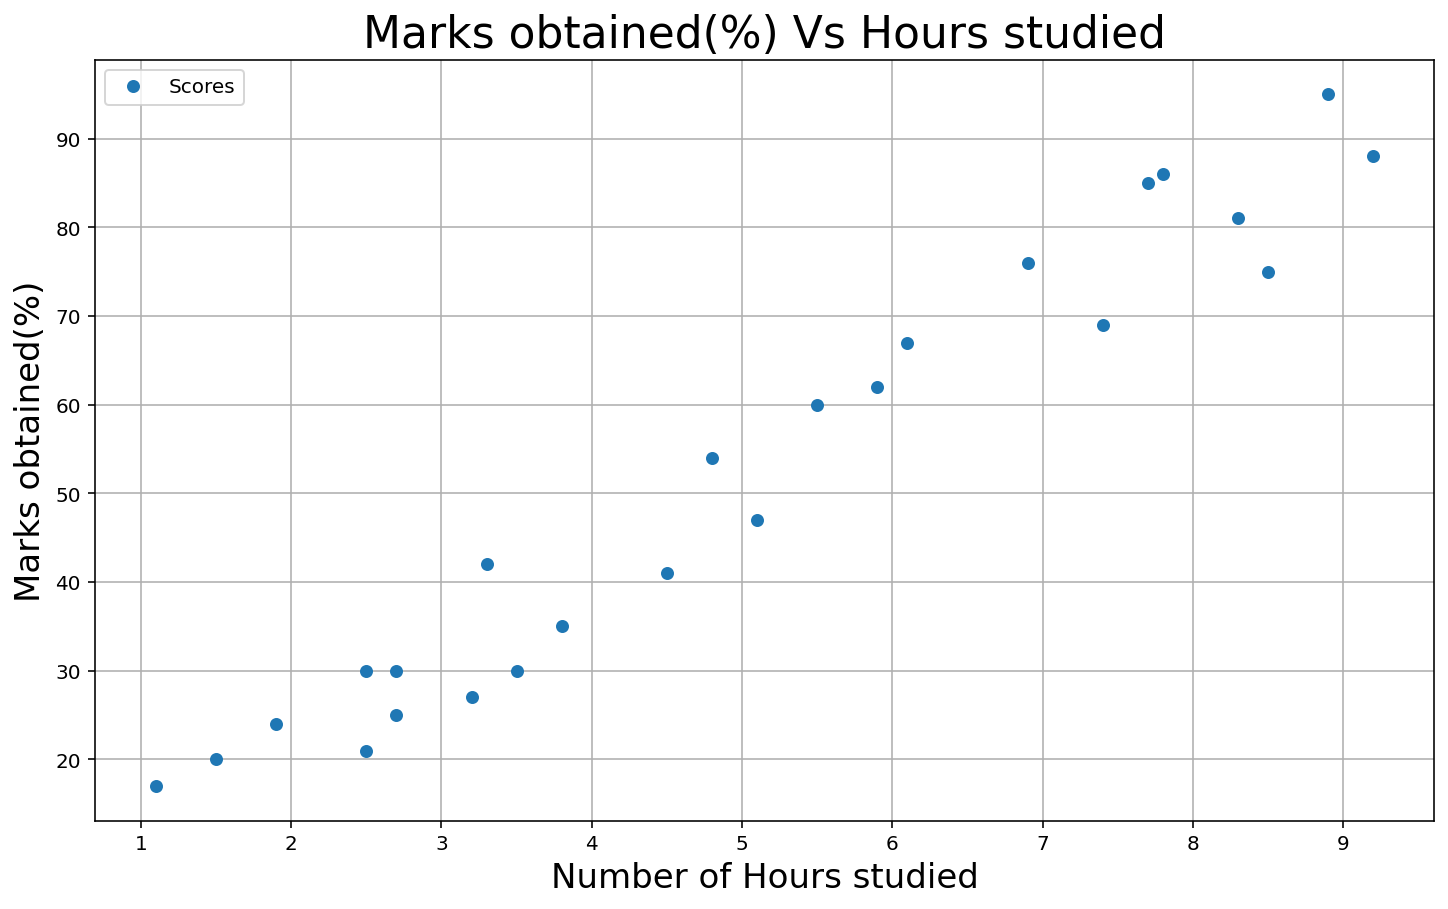

In [34]:
# plotting the graph to find the realtion between 2 variables
data.plot(x="Hours",y="Scores",style='.',markersize=11)
plt.title("Marks obtained(%) Vs Hours studied",size=22)
plt.xlabel("Number of Hours studied",size=17)
plt.ylabel("Marks obtained(%)",size=17)
plt.grid()
plt.show()

**--->From the graph we can clearly see a positive correlation between Number of Hours studied and marks obtained (i.e, as Number of Hours studied increases, Marks obtained also increases)**

<AxesSubplot: >

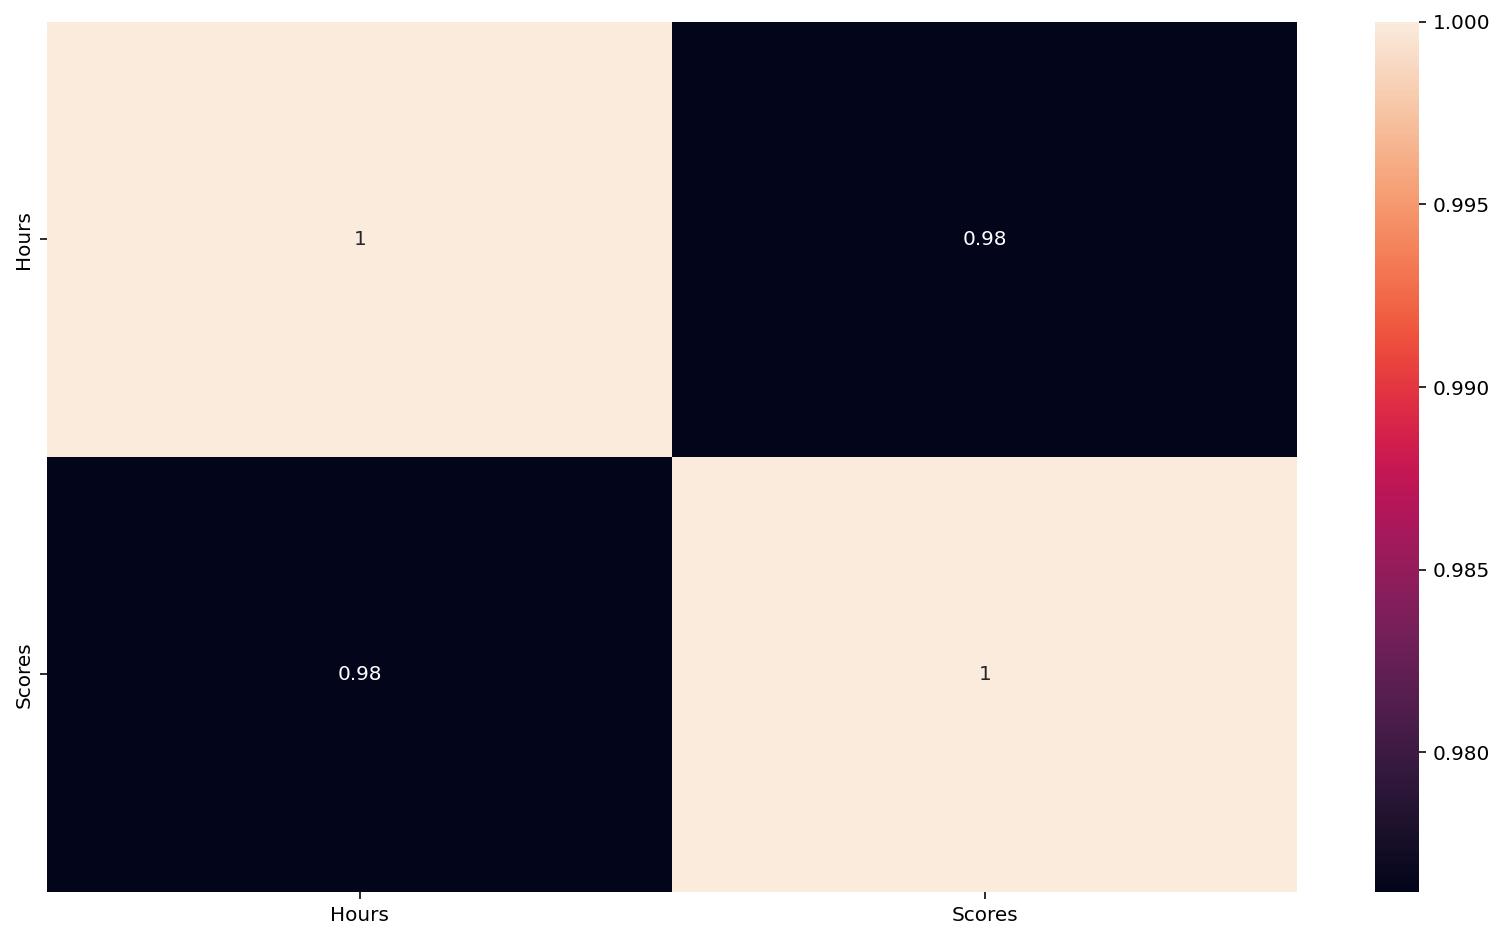

In [45]:
correlation=data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True)

**---> The figure shows one variable is highly dependent on another variable i.e, 0.98**

#### **Data Preparation**

In [7]:
# dividing the data into inputs and outputs
X=data.iloc[:, :1].values
y=data.iloc[:, 1:].values

In [17]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [23]:
#split the data into training(80%) and testing(20%) set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)

(20, 1) (20, 1)
(5, 1) (5, 1)


#### **Training The Algorithm**

In [24]:
# building simple linear regression model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
print("Training is completed")

Training is completed


#### **Visualizing The Model**

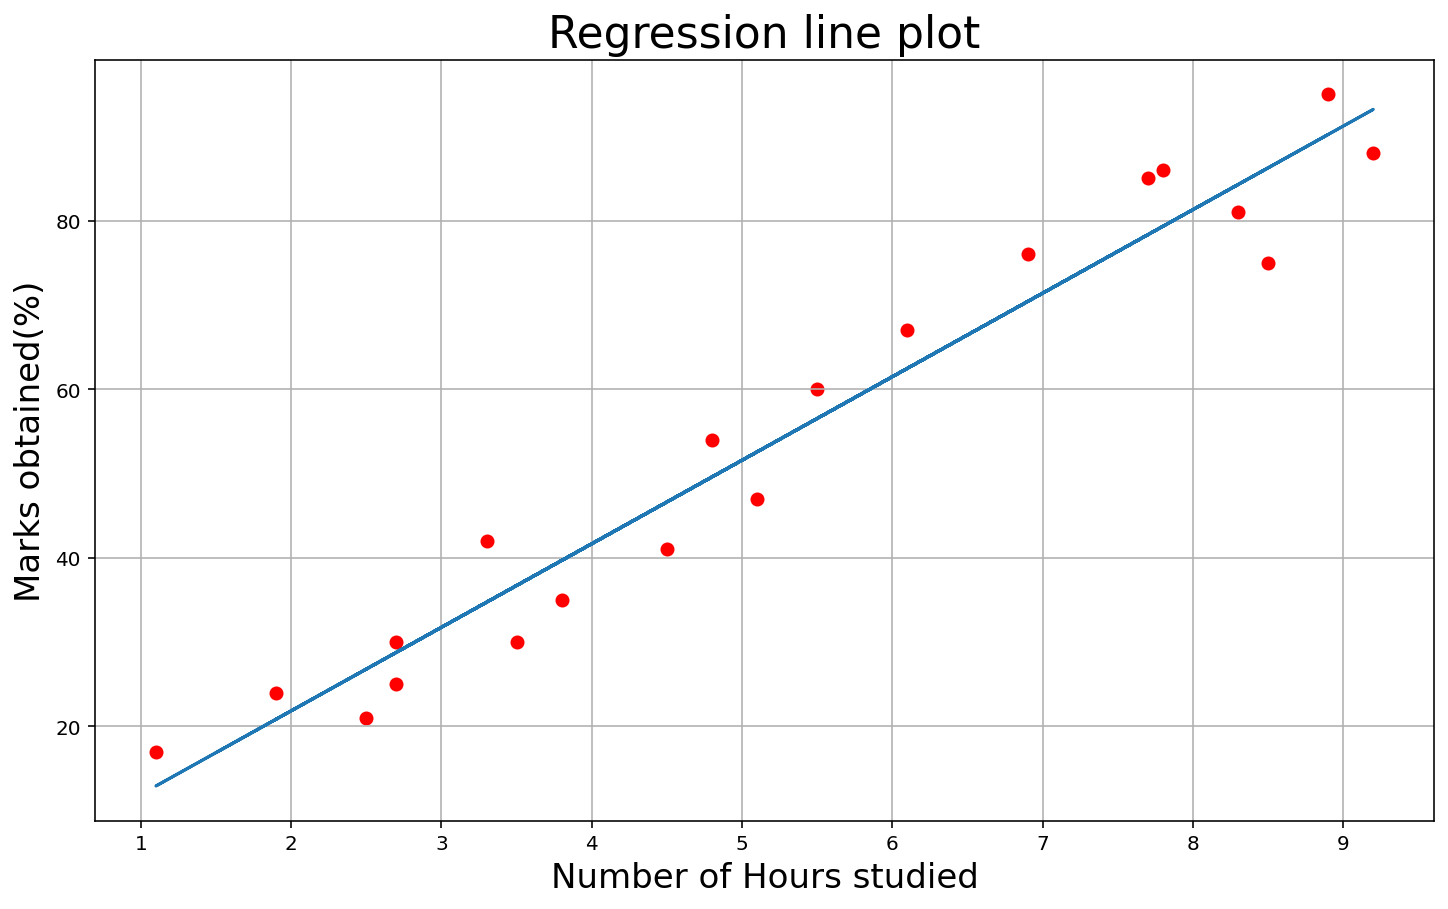

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [31]:
#plotting Regression line and test data

R_line=model.coef_*X + model.intercept_
plt.scatter(X_train,y_train,color='red')
plt.plot(X,R_line)
plt.title("Regression line plot",size=22)
plt.xlabel("Number of Hours studied",size=17)
plt.ylabel("Marks obtained(%)",size=17)
plt.grid()
plt.show()
k=data.corr()
k

#### **Testing The Model**

In [32]:
#before testing lets see our test data
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [34]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [36]:
#now predict for test data
y_pred=model.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

#### **Comparing The Scores**

In [110]:
# comparing the Actual values and predicted values
compare={
    'Actual values':[20,27,69,30,62],
    'predicted values':[16.88414476,33.73226078,75.357018,26.79480124,60.49103328]
}
df = pd.DataFrame(compare)
df

,Actual values,predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### **Visualizing The Comparision**

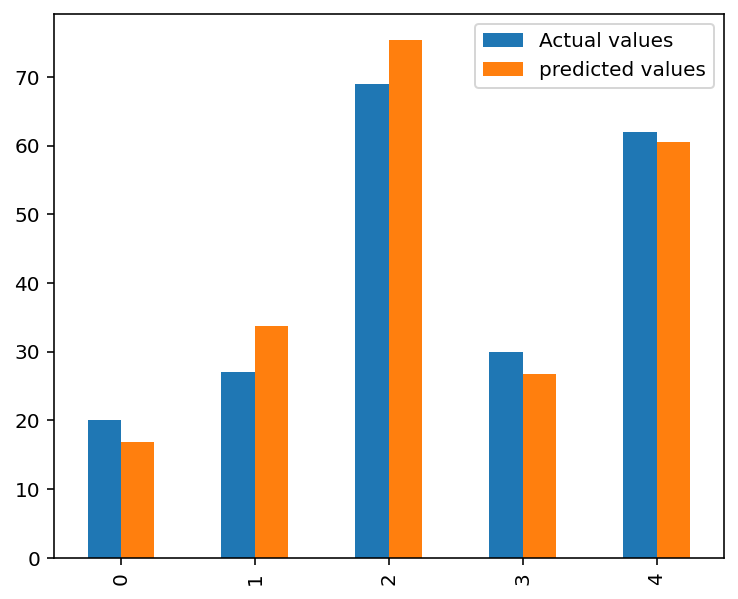

In [112]:
df.plot(kind='bar',figsize=(6,5))
plt.show()

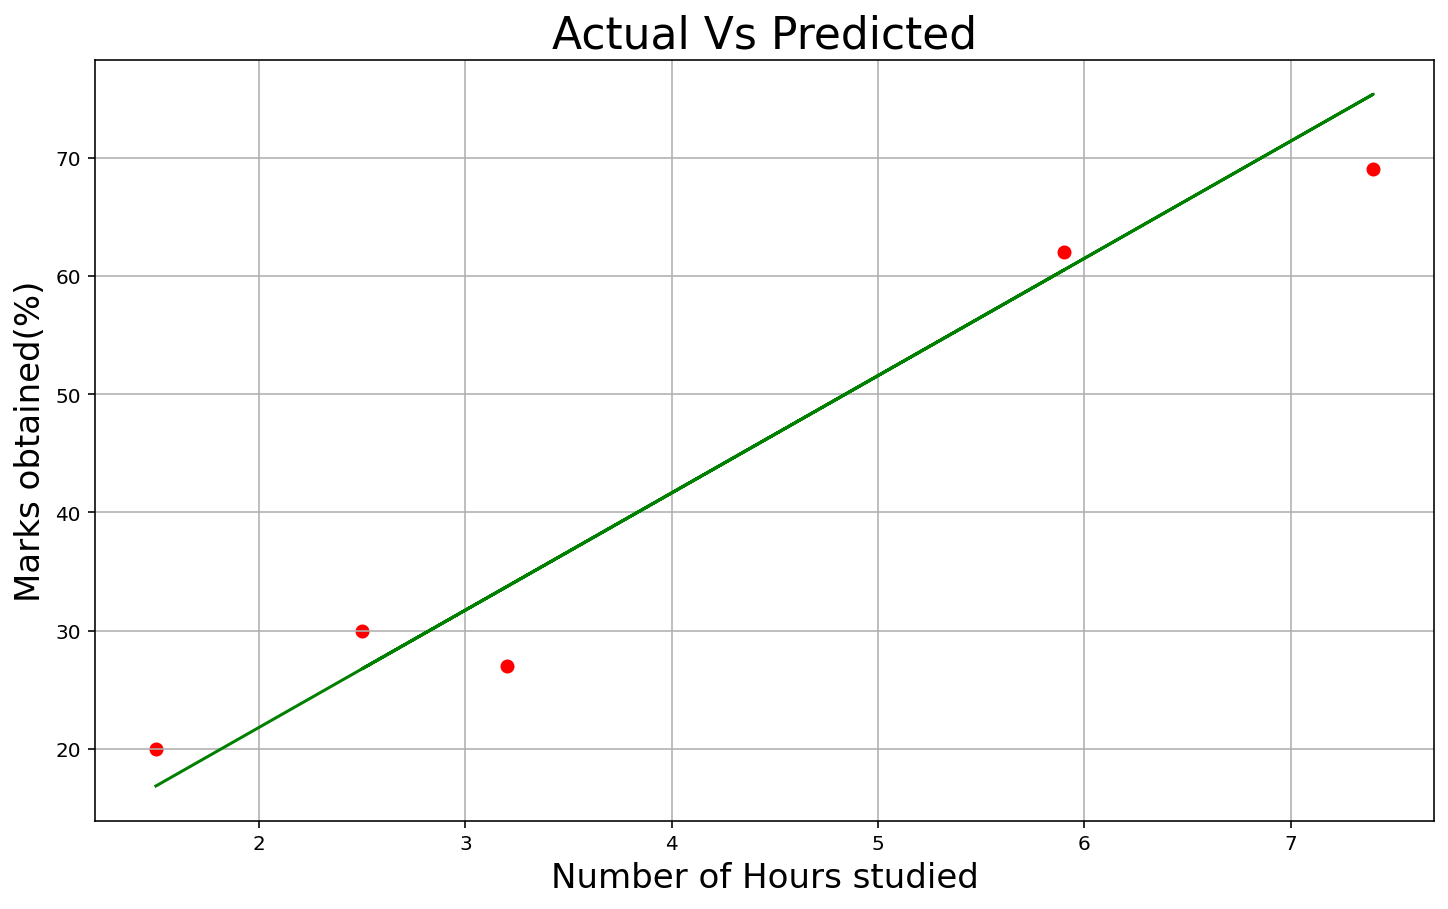

In [66]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='green')
plt.title("Actual Vs Predicted",size=22)
plt.xlabel("Number of Hours studied",size=17)
plt.ylabel("Marks obtained(%)",size=17)
plt.grid()
plt.show()

#### **Evaluating The Metrics**

In [72]:
# model evaluation metrics
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("mean Absolute error:",mean_absolute_error(y_test,y_pred))

mean squared error: 21.598769307217456
mean Absolute error: 4.183859899002982


#### **Making Prediction with the Custom Data**

In [94]:
Hours=9.25
pred=(model.predict([[Hours]])[0])
print("If a student studied {} Hours".format(Hours),"Then there score would be{} %".format(pred))


If a student studied 9.25 Hours Then there score would be[93.69173249] %


#### **Conclusion**

**---> I was Successfully able to carry-out prediction using Supervised Machine Learning task and was able to evaluate the model performance on various parameters.**

 **---> According to the Regression model if a student studies 9.25 hours per day he/she is likely to Score 93.7%.**

#### **THANK YOU**